In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math as math
import numpy as np

In [2]:
path='stack-overflow-developer-survey-2021'
public=pd.read_csv(path+'/survey_results_public.csv')

In [3]:
public.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [4]:
public.loc[:, ["ResponseId", "ToolsTechHaveWorkedWith"]]

,ResponseId,ToolsTechHaveWorkedWith
0,1,NaN
1,2,Docker;Git;Yarn
2,3,NaN
3,4,NaN
4,5,Docker;Git;Kubernetes;Yarn
...,...,...
83434,83435,Docker;Git
83435,83436,Git;Unity 3D;Unreal Engine
83436,83437,Ansible;Docker;Git;Terraform
83437,83438,Ansible;Docker;Git;Terraform


In [95]:
#"""
G = nx.Graph()
for a in range (len(public)):
#for a in range (1000):
    nodoLenguaje = public.to_numpy()[a][26]
    
    if str(nodoLenguaje) != "nan":
        listaLenguajes = nodoLenguaje.split(';')
        if len(listaLenguajes) < 4:
            for i in range(len(listaLenguajes)):
                j=i+1
                G.add_node(listaLenguajes[i])
                while j < len(listaLenguajes):
                    if (listaLenguajes[i], listaLenguajes[j]) in G.edges():
                        valor = G[listaLenguajes[i]][listaLenguajes[j]]
                        peso = valor['weight']
                        pesoN = peso+1
                        G[listaLenguajes[i]][listaLenguajes[j]]['weight'] = pesoN
                    else:    
                        G.add_edge(listaLenguajes[i], listaLenguajes[j])
                        G[listaLenguajes[i]][listaLenguajes[j]]['weight'] = 1
                    j+=1

#Guardar grafo
nx.write_graphml(G, "lenguajesPersonasTrabajanMenos4lenguajes.graphml")
#"""

#Cargar grafo
G = nx.read_graphml("lenguajesPersonasTrabajanMenos4lenguajes.graphml")
print(G.nodes)

['Docker', 'Git', 'Yarn', 'Kubernetes', 'Unity 3D', 'Terraform', 'Flow', 'Deno', 'Ansible', 'Unreal Engine', 'Puppet', 'Xamarin', 'Chef', 'Pulumi']


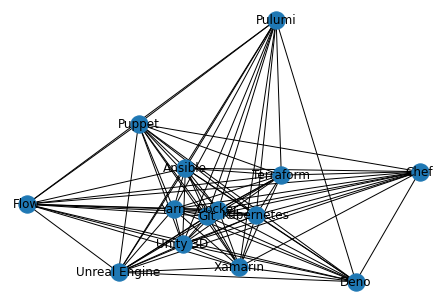

In [96]:
nx.draw(G, with_labels=True)

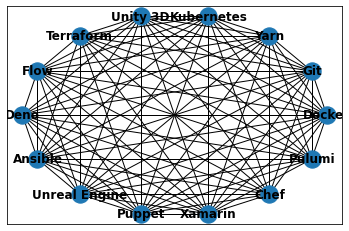

In [97]:
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True, font_weight='bold')
#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [98]:
nx.pagerank(G)

{'Docker': 0.2593082256377826,
 'Git': 0.3417677176208763,
 'Yarn': 0.09067033900736984,
 'Kubernetes': 0.07336644373688284,
 'Unity 3D': 0.05533734559747795,
 'Terraform': 0.027268105800206645,
 'Flow': 0.014711134139585736,
 'Deno': 0.014712005754963434,
 'Ansible': 0.03260361700701666,
 'Unreal Engine': 0.02422833241607144,
 'Puppet': 0.015121323849630296,
 'Xamarin': 0.026104353465014565,
 'Chef': 0.01327987061540474,
 'Pulumi': 0.011521185351716968}

In [99]:
nx.degree(G)

DegreeView({'Docker': 13, 'Git': 13, 'Yarn': 13, 'Kubernetes': 13, 'Unity 3D': 13, 'Terraform': 12, 'Flow': 13, 'Deno': 12, 'Ansible': 13, 'Unreal Engine': 13, 'Puppet': 13, 'Xamarin': 13, 'Chef': 12, 'Pulumi': 12})

In [100]:
nx.betweenness_centrality(G)

{'Docker': 0.0021367521367521365,
 'Git': 0.0021367521367521365,
 'Yarn': 0.0021367521367521365,
 'Kubernetes': 0.0021367521367521365,
 'Unity 3D': 0.0021367521367521365,
 'Terraform': 0.0010683760683760683,
 'Flow': 0.0021367521367521365,
 'Deno': 0.0010683760683760683,
 'Ansible': 0.0021367521367521365,
 'Unreal Engine': 0.0021367521367521365,
 'Puppet': 0.0021367521367521365,
 'Xamarin': 0.0021367521367521365,
 'Chef': 0.0010683760683760683,
 'Pulumi': 0.0010683760683760683}

In [101]:
nx.closeness_centrality(G)

{'Docker': 1.0,
 'Git': 1.0,
 'Yarn': 1.0,
 'Kubernetes': 1.0,
 'Unity 3D': 1.0,
 'Terraform': 0.9285714285714286,
 'Flow': 1.0,
 'Deno': 0.9285714285714286,
 'Ansible': 1.0,
 'Unreal Engine': 1.0,
 'Puppet': 1.0,
 'Xamarin': 1.0,
 'Chef': 0.9285714285714286,
 'Pulumi': 0.9285714285714286}

In [102]:
nx.eigenvector_centrality(G)

{'Docker': 0.2724151379534706,
 'Git': 0.2724151379534706,
 'Yarn': 0.2724151379534706,
 'Kubernetes': 0.2724151379534706,
 'Unity 3D': 0.2724151379534706,
 'Terraform': 0.2539192421508834,
 'Flow': 0.2724151379534706,
 'Deno': 0.2539192421508834,
 'Ansible': 0.2724151379534706,
 'Unreal Engine': 0.2724151379534706,
 'Puppet': 0.2724151379534706,
 'Xamarin': 0.2724151379534706,
 'Chef': 0.2539192421508834,
 'Pulumi': 0.2539192421508834}

In [103]:
pesos = {}
for edge in G.edges():
    peso = G[edge[0]][edge[1]]['weight']
    pesos[edge] = peso
    
#pesos

In [104]:
degree=np.array([x[1] for x in G.degree()])
gradoMed=0
cont=0
for i in degree:
    gradoMed+=i
    cont+=1
gradoMed=gradoMed/cont
print(len(G.edges())/len(G.nodes()))
print("El grado medio es:",gradoMed)
print("El máximo grado es:",degree.max())
print("El mínimo grado es:",degree.min())

6.357142857142857
El grado medio es: 12.714285714285714
El máximo grado es: 13
El mínimo grado es: 12


Text(0.5, 1.0, 'degree distribution')

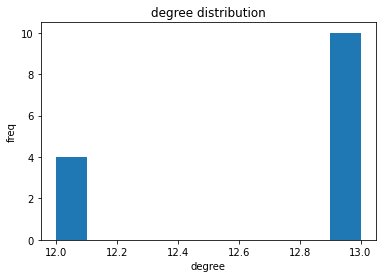

In [105]:
(n,x,p)=plt.hist(degree)
plt.xlabel('degree')
plt.ylabel('freq')
plt.title('degree distribution')

In [106]:
def calculaModularidad(G, particion):
    valor = 0
    i=0
    lista = []
    for i in particion:
        for j in i:
            lista.append(j)
    
    if len(lista)==len(G.nodes()) and len(particion)==1:
        return 0
    elif len(lista) == 1:
        valor = -1/math.pow(2*len(G.edges()),2)
        suma=0
        for i in lista:
            suma+=math.pow(G.degree(i),2)
        return(suma*valor)
    else:
        suma=0
        x=0
        for i in particion:
            long=len(i)
            valA = long/len(G.edges())
            se = set()
            for j in i:
                se.add(j[0])
                se.add(j[1])
            
            su=0
            for s in se:
                su+=G.degree(s)
            valB=su/(2*len(G.edges()))
            
            valB = math.pow(valB,2)
            x = valA - valB
            suma+=x
        return suma

In [107]:
for nodo in G.nodes():
    print("La modularidad correspondiente al nodo", nodo ,"es:",calculaModularidad(G,[{nodo}]))

La modularidad correspondiente al nodo Docker es: -0.005333922484534781
La modularidad correspondiente al nodo Git es: -0.005333922484534781
La modularidad correspondiente al nodo Yarn es: -0.005333922484534781
La modularidad correspondiente al nodo Kubernetes es: -0.005333922484534781
La modularidad correspondiente al nodo Unity 3D es: -0.005333922484534781
La modularidad correspondiente al nodo Terraform es: -0.004544880696881706
La modularidad correspondiente al nodo Flow es: -0.005333922484534781
La modularidad correspondiente al nodo Deno es: -0.004544880696881706
La modularidad correspondiente al nodo Ansible es: -0.005333922484534781
La modularidad correspondiente al nodo Unreal Engine es: -0.005333922484534781
La modularidad correspondiente al nodo Puppet es: -0.005333922484534781
La modularidad correspondiente al nodo Xamarin es: -0.005333922484534781
La modularidad correspondiente al nodo Chef es: -0.004544880696881706
La modularidad correspondiente al nodo Pulumi es: -0.0045

In [108]:
def eliminarArcos(G):
    
    lista = nx.edge_betweenness_centrality(G)
    arco = ()

    for clave, valor in sorted(lista.items(), key=lambda item: item[1], reverse = True):
        arco = clave
        break

    return arco

def detectarComunidades(G):
    compoConec = nx.connected_components(G)
    numCompoConec = nx.number_connected_components(G)

    while(numCompoConec == 1):
        
        G.remove_edge(eliminarArcos(G)[0],eliminarArcos(G)[1])
        compoConec = nx.connected_components(G)
        numCompoConec = nx.number_connected_components(G)

    return compoConec

In [109]:
modularidades = []
particiones = []

GC = G.copy()
ejercicio2 = detectarComunidades(GC)
parti=[]

j=1
for i in ejercicio2:
    par = []
    for ii in i:
        for n in GC.edges():
            if ii == n[0]:
                par.append(n)

    parti.append({n for n in par})
    
colores=calculaModularidad(G,parti)
print("Los grupos",parti,"tienen modularidad", colores)

Los grupos [{('Deno', 'Pulumi'), ('Git', 'Flow'), ('Unity 3D', 'Unreal Engine'), ('Docker', 'Deno'), ('Kubernetes', 'Unreal Engine'), ('Xamarin', 'Pulumi'), ('Ansible', 'Xamarin'), ('Xamarin', 'Chef'), ('Unity 3D', 'Deno'), ('Kubernetes', 'Deno'), ('Flow', 'Ansible'), ('Yarn', 'Unity 3D'), ('Git', 'Deno'), ('Docker', 'Puppet'), ('Yarn', 'Flow'), ('Flow', 'Chef'), ('Unreal Engine', 'Pulumi'), ('Unity 3D', 'Chef'), ('Unity 3D', 'Puppet'), ('Yarn', 'Unreal Engine'), ('Unreal Engine', 'Chef'), ('Kubernetes', 'Puppet'), ('Git', 'Puppet'), ('Deno', 'Xamarin'), ('Docker', 'Git'), ('Yarn', 'Deno'), ('Git', 'Unreal Engine'), ('Docker', 'Ansible'), ('Ansible', 'Puppet'), ('Yarn', 'Puppet'), ('Docker', 'Pulumi'), ('Docker', 'Kubernetes'), ('Docker', 'Chef'), ('Unity 3D', 'Ansible'), ('Flow', 'Pulumi'), ('Kubernetes', 'Ansible'), ('Unreal Engine', 'Xamarin'), ('Ansible', 'Unreal Engine'), ('Unity 3D', 'Pulumi'), ('Kubernetes', 'Pulumi'), ('Kubernetes', 'Chef'), ('Git', 'Chef'), ('Puppet', 'Pulumi'

In [ ]:
#https://programminghistorian.org/es/lecciones/crear-y-ver-archivos-html-con-python
#https://docs.python.org/es/3/library/webbrowser.html
#https://www.geeksforgeeks.org/creating-and-viewing-html-files-with-python/
#https://www.geeksforgeeks.org/how-to-write-to-an-html-file-in-python/
#https://pandas.pydata.org/docs/user_guide/index.html
#https://networkx.org/documentation/stable/tutorial.html
#https://www.ellaberintodefalken.com/2020/02/grafos-con-networkx.html //guardar grafos para no cargarlos desde 0
#https://www.codegrepper.com/code-examples/python/frameworks/file-path-in-python/networkx+draw+graph+with+weight //peso de los arcos

import webbrowser

f = open('holamundo.html','w')

mensaje = """<html>
<head>HEAD</head>
<body><p>Hola Mundo!</p></body>
</html>"""

mensaje2 = """<html>
<head>HEAD</head>
<body><p>Hola Mundo2!</p></body>
</html>"""

f.write(mensaje)
f.write(mensaje2)
f.close()

webbrowser.open_new_tab('holamundo.html')